In [1]:
import tensorflow as tf

In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [3]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model

from tensorflow.keras.applications.inception_v3 import InceptionV3

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img

from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt



In [5]:
path_train = 'data/train'
path_test = 'data/test'

In [6]:
image_size = [224,224]

In [7]:
inception = InceptionV3(input_shape = image_size + [3], weights = 'imagenet', include_top = False)

In [8]:
inception

In [10]:
folders = glob('data/train/*')

In [11]:
folders

['data/train\\diseased cotton leaf',
 'data/train\\diseased cotton plant',
 'data/train\\fresh cotton leaf',
 'data/train\\fresh cotton plant']

In [12]:
for layer in inception.layers:
    layer.trainable = False

In [13]:
x = Flatten()(inception.output)
prediction = Dense(len(folders), activation='softmax')(x)

In [14]:
model = Model(inputs = inception.input, outputs = prediction)
model.summary()

# 23 million params

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalization[0][0

In [15]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [17]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   zoom_range = 0.2,
                                   shear_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_set = train_datagen.flow_from_directory('data/train',
                                              target_size=(224, 224),
                                              batch_size = 32,
                                              class_mode = 'categorical')
                                          
test_set = test_datagen.flow_from_directory('data/test',
                                            target_size = (224,224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1951 images belonging to 4 classes.
Found 106 images belonging to 4 classes.


In [18]:
r = model.fit_generator(train_set, 
                        validation_data= test_set, 
                        epochs=20, 
                        steps_per_epoch= len(train_set), 
                        validation_steps = len(test_set))

C:\Users\vinee\AppData\Local\Temp\ipykernel_13364\1467949485.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(train_set,


Epoch 1/20


61/61 [==============================] - 61s 950ms/step - loss: 1.8039 - accuracy: 0.7601 - val_loss: 1.0110 - val_accuracy: 0.7642
Epoch 2/20
61/61 [==============================] - 46s 748ms/step - loss: 0.6345 - accuracy: 0.8898 - val_loss: 0.5651 - val_accuracy: 0.8962
Epoch 3/20
61/61 [==============================] - 46s 752ms/step - loss: 0.6301 - accuracy: 0.9042 - val_loss: 0.3197 - val_accuracy: 0.9434
Epoch 4/20
61/61 [==============================] - 46s 750ms/step - loss: 0.6417 - accuracy: 0.9072 - val_loss: 0.3857 - val_accuracy: 0.9151
Epoch 5/20
61/61 [==============================] - 46s 750ms/step - loss: 0.5953 - accuracy: 0.9165 - val_loss: 0.9301 - val_accuracy: 0.8679
Epoch 6/20
61/61 [==============================] - 46s 760ms/step - loss: 0.7087 - accuracy: 0.9170 - val_loss: 0.5233 - val_accuracy: 0.9057
Epoch 7/20
61/61 [==============================] - 47s 767ms/step - loss: 0.4407 - accuracy: 0.9354 - val_loss: 0.2251 - val_accuracy: 0.94

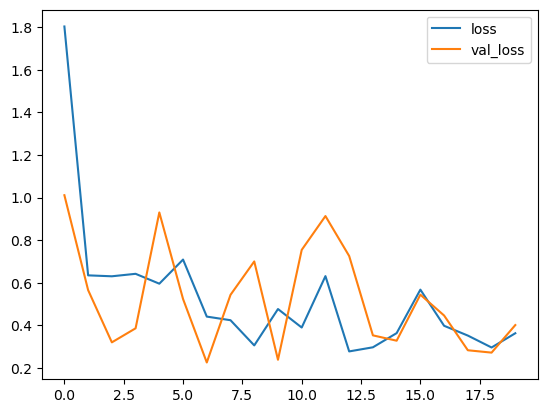

<Figure size 640x480 with 0 Axes>

In [19]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()
plt.savefig('lossVal_loss_inceptionv3')

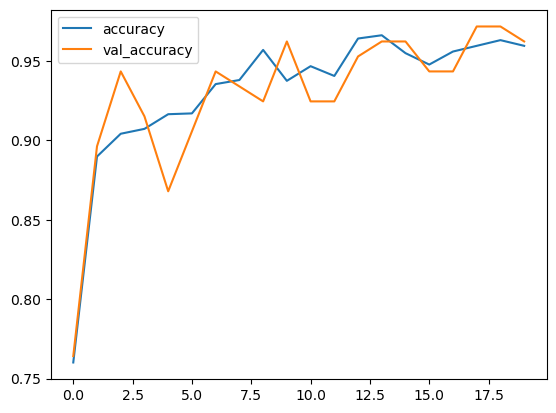

<Figure size 640x480 with 0 Axes>

In [20]:
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()
plt.savefig('acc_val_acc_inceptionv3')


In [21]:
y_pred = model.predict(test_set)
y_pred

4/4 [==============================] - 4s 650ms/step


array([[1.55661102e-18, 2.22364934e-28, 1.00000000e+00, 1.00857937e-27],
       [2.97334361e-31, 3.06727575e-28, 1.00000000e+00, 3.19007155e-35],
       [6.73494549e-09, 1.11315031e-28, 1.00000000e+00, 5.69777777e-26],
       [6.27653267e-17, 1.00000000e+00, 8.89674269e-21, 4.51648950e-25],
       [1.17515249e-34, 1.00000000e+00, 4.70656469e-37, 1.18613620e-28],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 8.26952097e-36],
       [1.00000000e+00, 8.42124979e-34, 1.45383965e-12, 7.09002220e-27],
       [2.38551670e-37, 8.98807100e-26, 6.39308608e-30, 1.00000000e+00],
       [4.68544351e-22, 1.00000000e+00, 2.46144118e-08, 2.42353570e-22],
       [1.82569097e-24, 1.09867264e-27, 1.00000000e+00, 1.03900100e-11],
       [5.87522066e-24, 1.23181409e-24, 1.00000000e+00, 3.41670279e-30],
       [2.74146816e-11, 2.78750321e-08, 1.26715491e-08, 1.00000000e+00],
       [1.00000000e+00, 6.17005597e-34, 2.65449194e-31, 1.43659016e-19],
       [0.00000000e+00, 1.02960691e-18, 2.10018754e

In [22]:
y_pred.shape

(106, 4)

In [23]:
final_pred = np.argmax(y_pred, axis=1)
final_pred

array([2, 2, 2, 1, 1, 1, 0, 3, 1, 2, 2, 3, 0, 3, 1, 3, 2, 1, 2, 2, 3, 3,
       2, 1, 1, 0, 2, 1, 1, 0, 1, 3, 1, 3, 1, 0, 0, 0, 1, 1, 0, 2, 2, 1,
       2, 2, 1, 1, 2, 3, 2, 0, 3, 3, 2, 2, 0, 3, 3, 2, 0, 3, 3, 1, 3, 3,
       1, 2, 1, 0, 3, 0, 1, 0, 1, 0, 0, 1, 0, 3, 1, 1, 1, 3, 2, 1, 1, 2,
       2, 2, 3, 0, 2, 2, 1, 0, 3, 3, 0, 3, 0, 0, 0, 1, 2, 0], dtype=int64)

In [24]:
y_pred.shape

(106, 4)

In [25]:
model.save('model_inceptionv3.h5')

c:\Users\vinee\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [3]:
### Tommorrow

In [26]:
from tensorflow.keras.models import load_model

model=load_model('model_inceptionv3.h5')

In [27]:
y_pred = model.predict(test_set)
len(y_pred)

4/4 [==============================] - 4s 624ms/step


106

In [28]:
y_pred = model.predict(test_set)
y_pred_fin = np.argmax(y_pred, axis=1)
y_pred_fin

4/4 [==============================] - 3s 761ms/step


array([0, 3, 0, 0, 2, 3, 2, 2, 3, 3, 2, 3, 0, 1, 1, 3, 0, 3, 2, 1, 2, 0,
       1, 3, 1, 2, 1, 1, 0, 0, 0, 1, 2, 2, 3, 3, 2, 2, 3, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 0, 1, 0, 0, 3, 1, 1, 3, 2, 1, 2, 0, 1, 0, 1, 0, 1, 2,
       0, 3, 3, 3, 1, 0, 3, 1, 1, 1, 2, 3, 2, 1, 0, 2, 0, 1, 0, 1, 2, 1,
       0, 1, 2, 3, 2, 0, 2, 3, 3, 3, 0, 1, 1, 2, 0, 3, 2, 3], dtype=int64)